In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#r2(r squared) score is nothing but coeffiecient of determination
from sklearn.metrics import r2_score

In [26]:
#The numpy.random.rand() function creates an array of specified shape and fills it with random values. Syntax : numpy.random.rand(d0, d1, ..., dn) Parameters : d0, d1, ..., dn : [int, optional]Dimension of the returned array we require, If no argument is given a single Python float is returned
#X is a one dimensional array with 200 values 
X=6*np.random.rand(200,1)-3
#randn generates samples from the normal distribution, while numpy. random. rand from a uniform distribution (in the range [0,1)).
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)

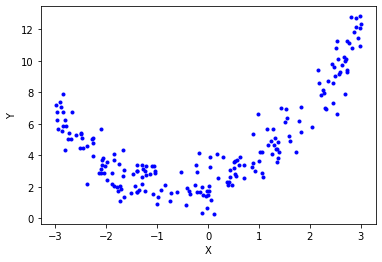

In [27]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [29]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.45489635463372446


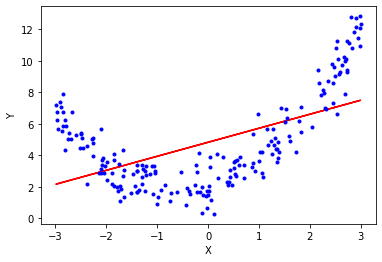

In [30]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [31]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.9004740790729655


From the above results we can tell that the accuracy of Polynomial regression is far better than linear regression

In [32]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.8863979  0.79320723]]
[2.10747843]


#linspace is an in-built function in Python's NumPy library. It is used to create an evenly spaced sequence in a specified interval.

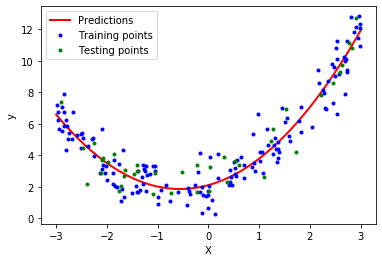

In [33]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [35]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new) 
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler=StandardScaler()
    lin_reg=LinearRegression()
    polynomial_regression=Pipeline([("poly_features",polybig_features),("std_scaler", std_scaler),("lin_reg", lin_reg)])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show() 


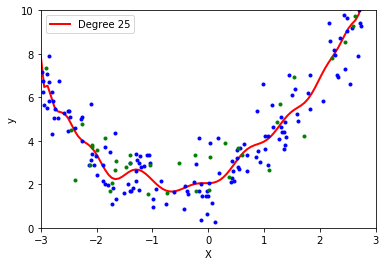

In [36]:
polynomial_regression(25)

In [81]:
#pip install plotly

Note: you may need to restart the kernel to use updated packages.
